# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
# importing the long list of libraries all as one. --> copy this one and the EDV one for the most complete libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df_diag = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df_diag.shape)
df_diag.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df = df_diag.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [3]:
# storing the diagnosis into a separate column to use for hte "hue" on the sns pairplot. 
diag = df_diag['diagnosis']

In [4]:
# Initialize an instance of the KMeans class from sklearn.
k = 2
model = KMeans(n_clusters=k, max_iter=1)

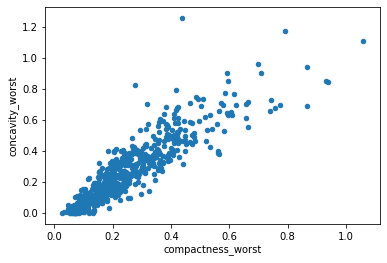

In [5]:
feature_extraction = ['compactness_worst', 'concavity_worst']
df[feature_extraction].plot(kind="scatter", x=feature_extraction[0], y=feature_extraction[1]);
# realizing that data exploration is requiredto visualize more features. 

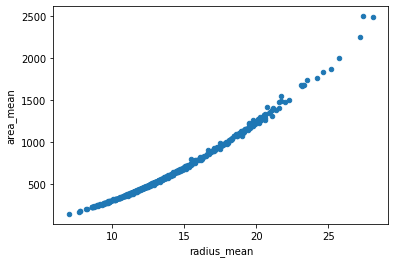

In [6]:
feature_test = ['radius_mean', 'area_mean']
df[feature_test].plot(kind="scatter", x=feature_test[0], y=feature_test[1]);
# realizing that data exploration is requiredto visualize more features. 

In [7]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [8]:
df1 = df[df.columns[0:5]]
df1['diagnosis'] = diag

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
df2 = df[df.columns[5:10]]
df2['diagnosis'] = diag

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


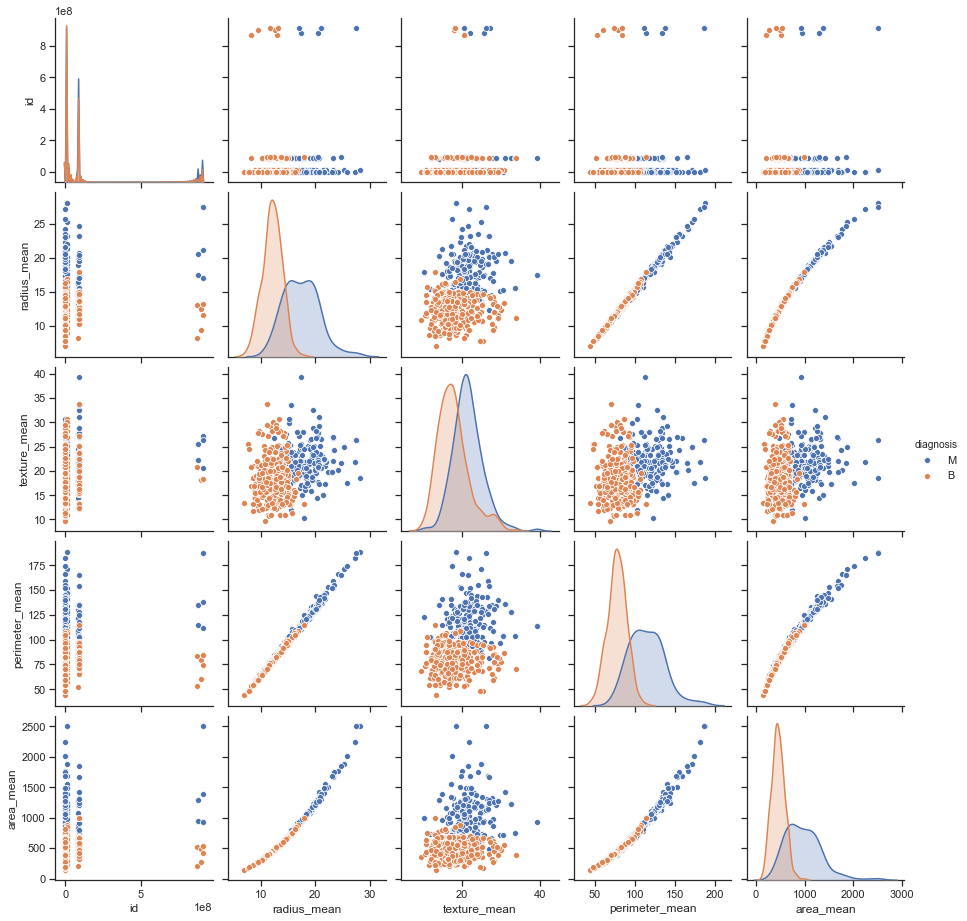

In [10]:
g = sns.pairplot(df1, hue = 'diagnosis')

In [11]:
features = [ 'texture_mean', 'perimeter_mean']

In [12]:
# Fit the instantiated model to our sliced dataframe
model.fit(df[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
# Assign clusters back to our dataframe
df['cluster'] = model.labels_

In [14]:
# Get our centroids
centroids    =  model.cluster_centers_

In [15]:
# turn them into a dataframe
cc  =  pd.DataFrame(centroids)
cc.head()

,0,1
0,18.453064,79.325441
1,21.409689,124.009938


In [16]:
# Setup some colors for plotting
# base colors is the same as 'k'
base_colors  =  ['r', 'g']
colors       =  [base_colors[centroid] for centroid in model.labels_]

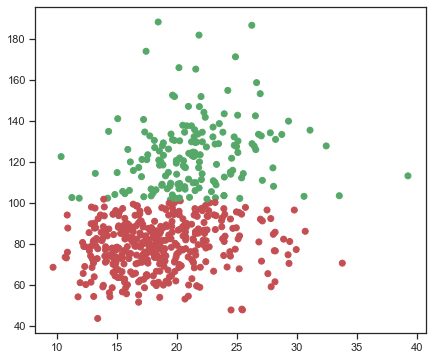

In [17]:
# Plot the scatter of our points with calculated centroids
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(df[features[0]], df[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

In [18]:
df['diagnosis'] = df_diag['diagnosis']

In [19]:
df.sample(10)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,cluster,diagnosis
243,88411702,13.75,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,0.1773,...,706.0,0.09368,0.14420,0.1359,0.06106,0.2663,0.06321,NaN,0,B
469,911366,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,...,528.1,0.17800,0.28780,0.3186,0.14160,0.2660,0.09270,NaN,0,B
514,91594602,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,0.1561,...,967.0,0.12460,0.21010,0.2866,0.11200,0.2282,0.06954,NaN,0,M
516,916799,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,...,1493.0,0.14920,0.25360,0.3759,0.15100,0.3074,0.07863,NaN,1,M
148,86973702,14.44,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,...,766.9,0.13160,0.27350,0.3103,0.15990,0.2691,0.07683,NaN,0,B
531,91903901,11.67,20.02,75.21,416.2,0.10160,0.09453,0.04200,0.02157,0.1859,...,550.6,0.15500,0.29640,0.2758,0.08120,0.3206,0.08950,NaN,0,B
67,859465,11.31,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,...,466.7,0.12900,0.09148,0.1444,0.06961,0.2400,0.06641,NaN,0,B
480,912193,12.16,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,0.1464,...,547.4,0.12080,0.22790,0.1620,0.05690,0.2406,0.07729,NaN,0,B
213,881094802,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,...,1021.0,0.12430,0.17930,0.2803,0.10990,0.1603,0.06818,NaN,1,M
128,866458,15.10,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,...,762.6,0.13860,0.28830,0.1960,0.14230,0.2590,0.07779,NaN,0,B


## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [20]:
# Your Code Here]

# recode diagnosis or cluster 
df['correct'] = df['cluster'] == df['diagnosis'].replace('M',1).replace('B',0)

In [21]:
the_obv = sum(df['correct']) / len(df['correct'])

print("the observation is: ", the_obv)

the observation is:  0.8822495606326889


In [63]:
df_drop = df.drop('diagnosis', axis=1)

In [65]:
# what's our silhouette score?
metrics.silhouette_score(df_drop, model.labels_, metric='euclidean')

0.156895706406816

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [22]:
# refreshing the data-set
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
# droping the diagnosis categorey from the pandas df. 
df = df.drop('diagnosis', axis=1)


In [30]:
df.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [31]:
df = df.drop(['Unnamed: 32'], axis=1)

In [32]:
# instantiate the SKLearn class for standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
# Standardize the dataset (default is normalization)
scaled_data = scaler.fit_transform(df)

In [34]:
# this time keep all 4 variables
features=list(df.columns)
features;

In [35]:
df_scaled = pd.DataFrame(scaled_data,columns=features)
df_scaled.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [36]:
df_scaled.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [37]:
one = df_scaled.mean()
two = df_scaled[features].std()
print ("The Mean is: ", one)
print ("The std is: ", two)

The Mean is:  id                         8.877882e-18
radius_mean               -1.256562e-16
texture_mean               1.049736e-16
perimeter_mean            -1.272171e-16
area_mean                 -1.900452e-16
smoothness_mean            1.490704e-16
compactness_mean           2.544342e-16
concavity_mean            -1.338511e-16
concave points_mean       -8.429110e-17
symmetry_mean              2.081912e-16
fractal_dimension_mean     5.408679e-16
radius_se                  2.475807e-16
texture_se                -9.912009e-17
perimeter_se              -2.968237e-16
area_se                   -1.088760e-16
smoothness_se              4.426014e-16
compactness_se             1.958988e-16
concavity_se               1.678017e-16
concave points_se          2.185325e-17
symmetry_se                1.523874e-16
fractal_dimension_se      -5.658430e-17
radius_worst              -7.988142e-16
texture_worst             -1.834112e-17
perimeter_worst           -4.015534e-16
area_worst                

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [39]:
# Apply PCA to the data
pca_features = pca.fit_transform(df_scaled)
pca_features[:5]

array([[ 9.18319983,  1.97127137],
       [ 2.38329766, -3.75345877],
       [ 5.74247239, -1.08035048],
       [ 7.12438398, 10.27222513],
       [ 3.94569386, -1.95968949]])

In [40]:
#  how much variation did each principal component explain?
pca.explained_variance_ratio_

array([0.42864701, 0.18376792])

In [41]:
# How much total variance did we explain?
sum(pca.explained_variance_ratio_)

0.6124149284660224

In [42]:
# How much information did we lose?
1-sum(pca.explained_variance_ratio_)

0.3875850715339776

In [43]:
# Turn that into a dataframe.
df_pca=pd.DataFrame(pca_features, columns=['comp_1', 'comp_2'])
df_pca.head()

,comp_1,comp_2
0,9.183200,1.971271
1,2.383298,-3.753459
2,5.742472,-1.080350
3,7.124384,10.272225
4,3.945694,-1.959689


In [44]:
## now apply the clustering: 
k = 2 
model = KMeans(n_clusters=k, max_iter=1)

In [45]:
# Fit the instantiated model to our sliced dataframe
model.fit(df_pca.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
# Assign predicted clusters back to our dataframe
df_pca['cluster'] = model.labels_

In [47]:
# Get our centroids
centroids    =  model.cluster_centers_

In [48]:
# turn them into a dataframe
cc  =  pd.DataFrame(centroids)
cc.head()

,0,1
0,4.939878,-0.084885
1,-1.915709,0.032919


In [49]:
# base colors is the same as 'k'
base_colors  =  ['r', 'g']
colors       =  [base_colors[centroid] for centroid in model.labels_]

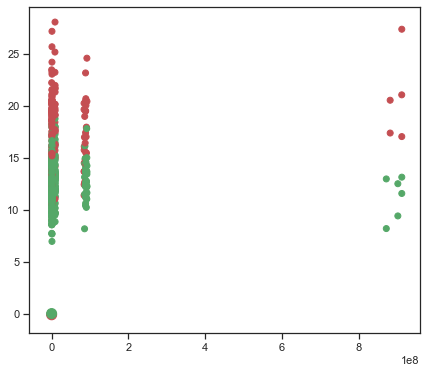

In [50]:
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(df[features[0]], df[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

In [58]:
df['diagnosis'] = df_diag['diagnosis']

In [59]:
# recode diagnosis or cluster 
df_pca['correct'] = df_pca['cluster'] == df['diagnosis'].replace('M',1).replace('B',0)

In [61]:
the_obv = sum(df_pca['correct']) / len(df_pca['correct'])

print("the observation is: ", the_obv)

the observation is:  0.09666080843585237


In [52]:
# what's our silhouette score?
from sklearn import metrics 
metrics.silhouette_score(df, model.labels_, metric='euclidean')

0.156895706406816

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project